# DHASARATHAN T
#INTERNSAVY

## Task-1 : Use classification technique for prediction of Graduate Admissions from an Indian perspective

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acs
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lg
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  
from catboost import CatBoostClassifier

In [3]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df.shape

(500, 9)

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df = df.rename(columns={'GRE Score': 'GRE_Score', 'TOEFL Score': 'TOEFL_Score','University Rating':'University_Rating','Chance of Admit ':'Chance_of_Admit'})

In [12]:
df.drop("Serial No.",axis=1,inplace=True)

In [13]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [14]:
df.nunique()

GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance_of_Admit       61
dtype: int64

In [15]:
df["Chance_of_Admit"].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

## Data Visualization

### UNIVARIATE ANALYSIS

Let's see the distribution of the data in each column

1. University Rating  

<AxesSubplot:xlabel='University_Rating', ylabel='count'>

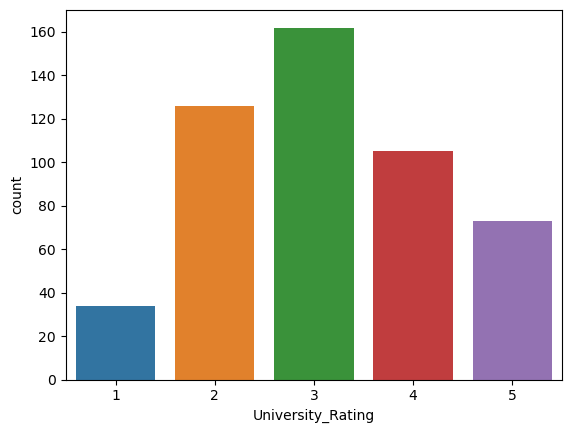

In [16]:
sns.countplot(data=df,x='University_Rating')

2.Research

<AxesSubplot:xlabel='Research', ylabel='count'>

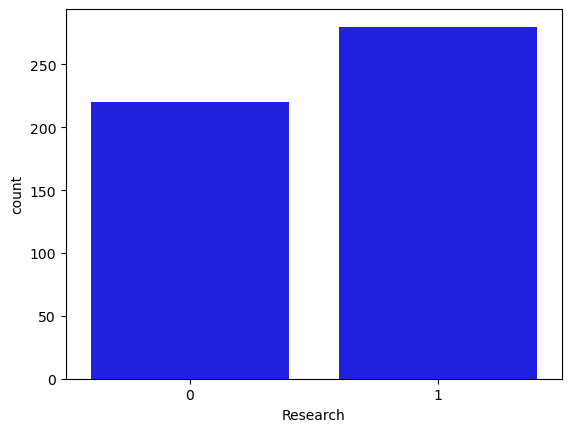

In [17]:
sns.countplot(data=df,x='Research',color='blue')

3.Chance of Admit 

<AxesSubplot:xlabel='count', ylabel='Chance_of_Admit'>

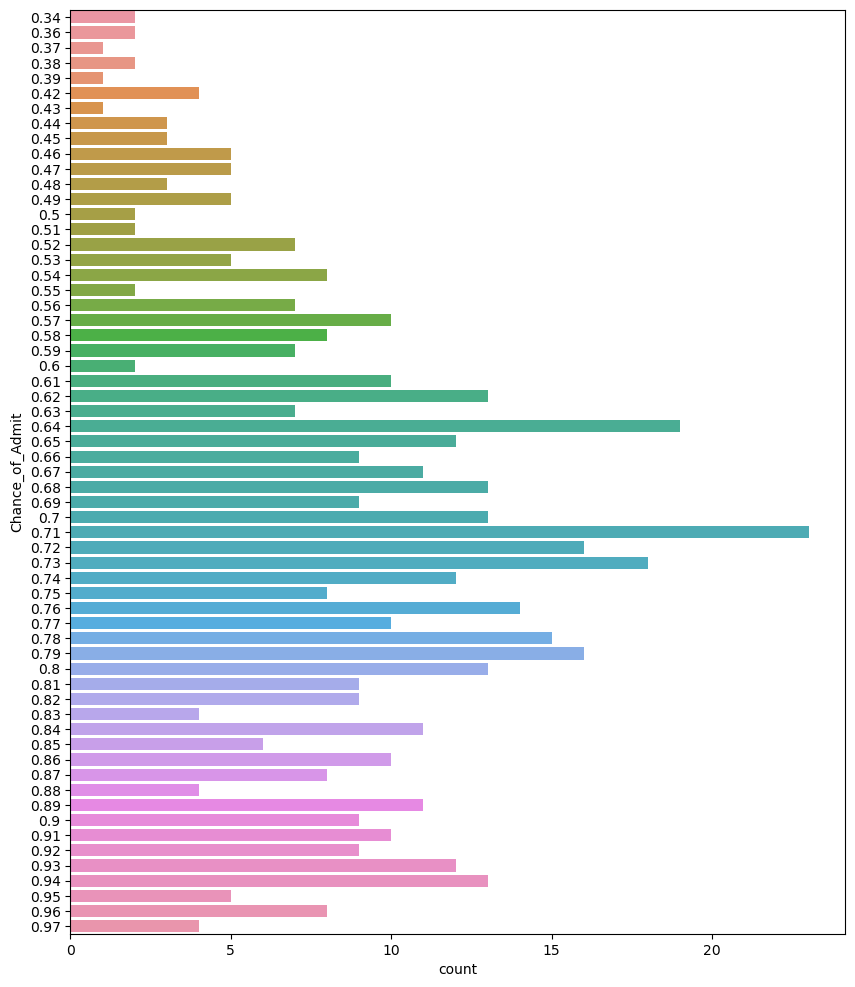

In [18]:
plt.figure(figsize=(10,12))
sns.countplot(data=df,y='Chance_of_Admit')

<AxesSubplot:xlabel='Chance_of_Admit', ylabel='Density'>

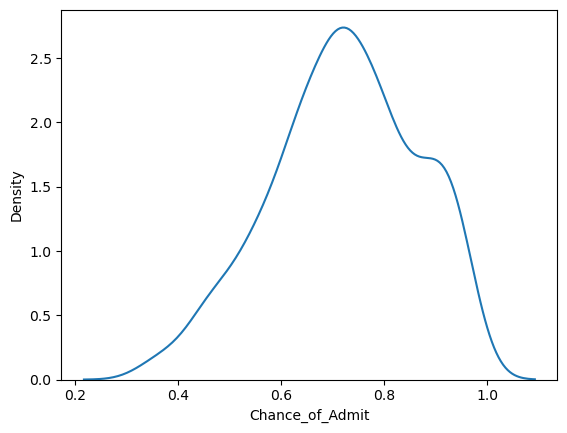

In [19]:
sns.kdeplot(data=df,x='Chance_of_Admit')

In [20]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='TOEFL_Score', ylabel='Chance_of_Admit'>

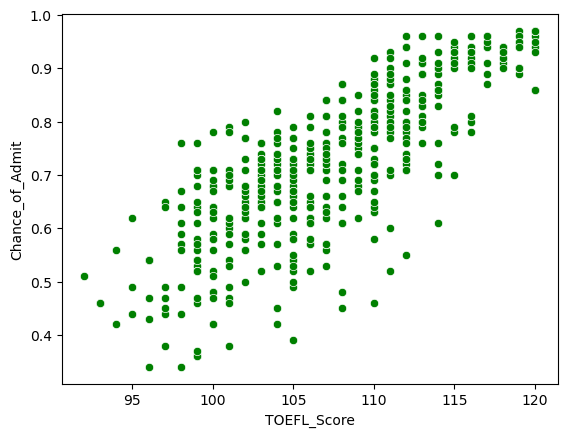

In [21]:
sns.scatterplot(data=df,y='Chance_of_Admit',x='TOEFL_Score',color='green')

<AxesSubplot:xlabel='Chance_of_Admit', ylabel='GRE_Score'>

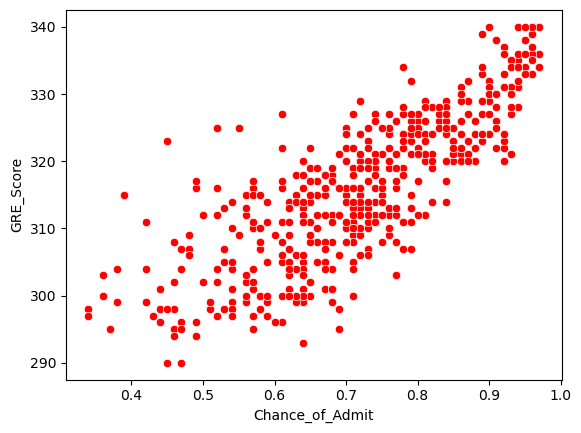

In [22]:
sns.scatterplot(data=df,x='Chance_of_Admit',y='GRE_Score',color='red')

<AxesSubplot:xlabel='Chance_of_Admit', ylabel='Research'>

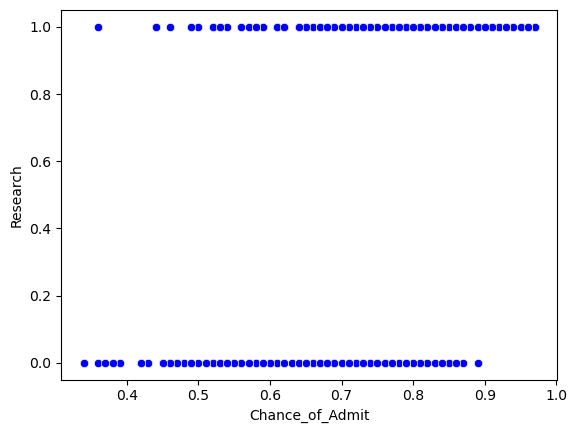

In [23]:
sns.scatterplot(data=df,x='Chance_of_Admit',y='Research',color='blue')

<AxesSubplot:xlabel='Chance_of_Admit', ylabel='CGPA'>

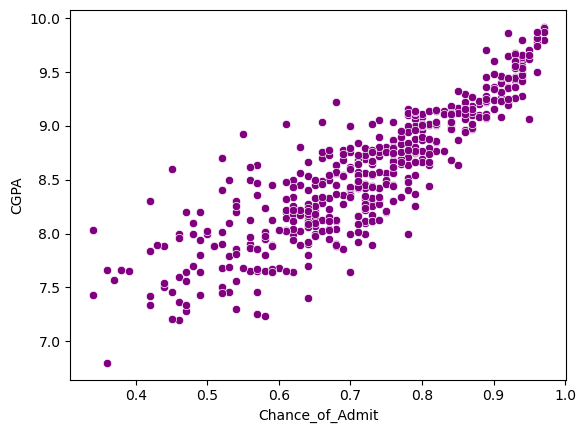

In [24]:
sns.scatterplot(data=df,x='Chance_of_Admit',y='CGPA',color='purple')

<AxesSubplot:>

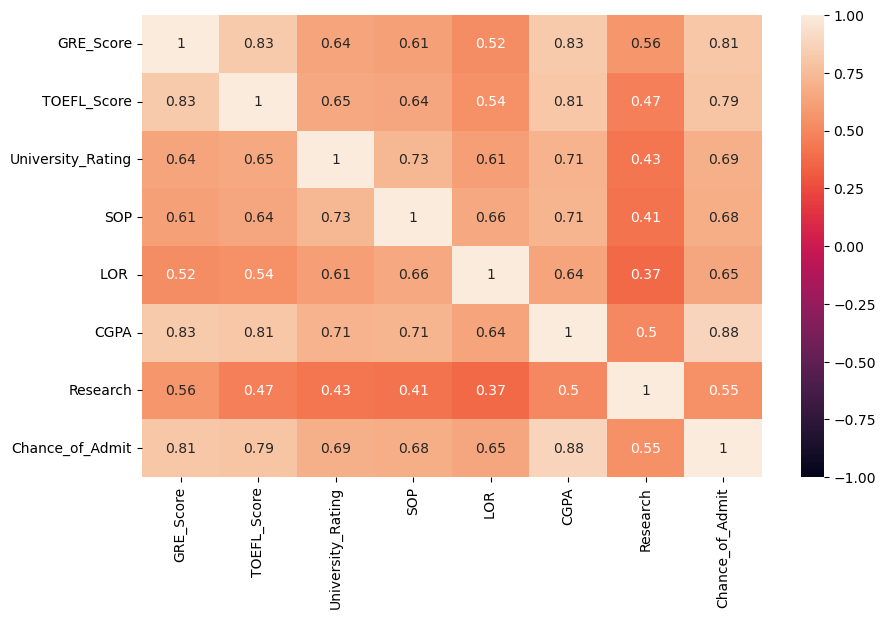

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

### To Apply the Classification Techniques

In [26]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### The third quartile (Q3, or the upper quartile) is the 75th percentile, meaning that 75% of the data falls below the third quartile i.e., chance_of_admit=0.82 we can take 0.2 more than that that is chance_of_admit=0.84.

In [27]:
c=[]
for i in df['Chance_of_Admit']:
    if i>0.84:
        c.append(1)
    else:
        c.append(0)

In [28]:
c

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [29]:
df['Chance_Of_Admit']=c

In [30]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Chance_Of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,0
4,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
497,330,120,5,4.5,5.0,9.56,1,0.93,1
498,312,103,4,4.0,5.0,8.43,0,0.73,0


* Note: Chance_of_Admit=1 means that admission is posssible else it is not.

In [31]:
df["Chance_Of_Admit"].value_counts()

0    391
1    109
Name: Chance_Of_Admit, dtype: int64

In [32]:
df.drop("Chance_of_Admit",axis=1,inplace=True)

### Spliting the data

In [33]:
x=df.drop("Chance_Of_Admit",axis=1)
y=df["Chance_Of_Admit"]

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1000)

In [35]:
x_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
226,306,110,2,3.5,4.0,8.45,0
64,325,111,3,3.0,3.5,8.70,0
117,290,104,4,2.0,2.5,7.46,0
16,317,107,3,4.0,3.0,8.70,0
391,318,106,3,2.0,3.0,8.65,0
...,...,...,...,...,...,...,...
251,316,99,2,2.5,3.0,9.00,0
192,322,114,5,4.5,4.0,8.94,1
71,336,112,5,5.0,5.0,9.76,1
87,317,107,2,3.5,3.0,8.28,0


### Logistic Regression

In [36]:
lr = lg().fit(x_train,y_train)
Pred1 = lr.predict(x_test)
Pred1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
print("Training Accuracy:",lr.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,Pred1))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred1))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred1))

Training Accuracy: 0.9413333333333334
------------------------------------------------------------
Testing Accuracy:
 0.936
-------------------------------------------------
Confusion Matrix:
 [[99  2]
 [ 6 18]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       101
           1       0.90      0.75      0.82        24

    accuracy                           0.94       125
   macro avg       0.92      0.87      0.89       125
weighted avg       0.93      0.94      0.93       125



### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier as dtc

dt = dtc().fit(x_train,y_train)
Pred2 = dt.predict(x_test)
Pred2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
print("Training Accuracy:",dt.score(x_train,y_train))
print("------------------------------------------------------------")
print(" Testing Accuracy:\n" ,acs(y_test,Pred2))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred2))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred2))

Training Accuracy: 1.0
------------------------------------------------------------
 Testing Accuracy:
 0.968
-------------------------------------------------
Confusion Matrix:
 [[99  2]
 [ 2 22]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       0.92      0.92      0.92        24

    accuracy                           0.97       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.97      0.97      0.97       125



### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [41]:
from sklearn.ensemble import RandomForestClassifier as rfc
rf = rfc().fit(x_train,y_train)
Pred = rf.predict(x_test)
Pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
print("Training Accuracy:",rf.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,Pred))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy:
 0.976
-------------------------------------------------
Confusion Matrix:
 [[99  2]
 [ 1 23]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       101
           1       0.92      0.96      0.94        24

    accuracy                           0.98       125
   macro avg       0.96      0.97      0.96       125
weighted avg       0.98      0.98      0.98       125



### XGBoost

In [43]:
import xgboost as xgb

In [44]:
xgb1=xgb.XGBClassifier()
xgb1.fit(x_train,y_train)
predictions = xgb1.predict(x_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [45]:
print("Training Accuracy:",xgb1.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,predictions))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,predictions))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,predictions))

Training Accuracy: 0.9973333333333333
------------------------------------------------------------
Testing Accuracy:
 0.984
-------------------------------------------------
Confusion Matrix:
 [[100   1]
 [  1  23]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       101
           1       0.96      0.96      0.96        24

    accuracy                           0.98       125
   macro avg       0.97      0.97      0.97       125
weighted avg       0.98      0.98      0.98       125



<AxesSubplot:>

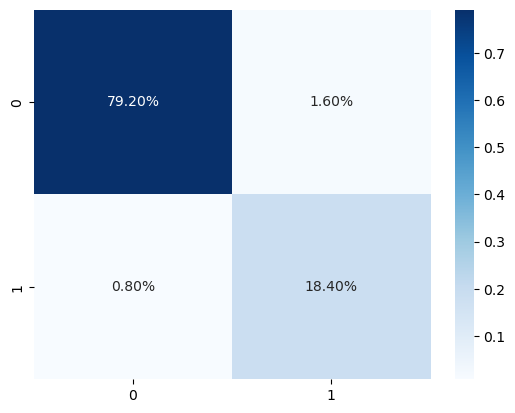

In [46]:
cf_matrix=cm(y_test,Pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt=".2%",cmap="Blues")

In [47]:
import pickle
pickle_out = open('randomclassifier.pkl',"wb")
pickle.dump(rf,pickle_out)
pickle_out.close()